# Support Vector Machine (SVM)

 
 #### first name and last name :
 #### sciper number :

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`. <br/>
We highly recommend you to read each line of code carefully and try to understand what it exactly does. <br/>
Just alter the parts that is between green comments and specified for you. Please do not change other parts.

In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Soft margin SVM
### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label that is called target. We should find a proper hyperplane that separates malignant and benign samples.
The original dataset labels is 0 and 1 and in the following code boxes we change it to -1 and 1.

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
cancer.target = np.where(cancer.target==0, -1, cancer.target) 
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO: using train_test_split package, split your data into 3 numpy array     #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 72%     test : 20%       validation : 8%                            #
################################################################################

X = df.drop(['target'], axis=1)
y = cancer.target

#first splitting into 80/20 (training + validation)/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y) 

#then splitting train set into train + validation in a 90/10 split, since 10% of the second split corresponds to 8% in total
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, stratify=y_train) 


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

71.8804920913884 %
71.8804920913884 %
20.035149384885763 %
20.035149384885763 %
8.084358523725834 %
8.084358523725834 %


### soft margin SVM optimization:<br/>
We add 1 at the beginning of each Xs data (X_train, X_val , ...) and then the bias will be calculated implicitly.
Then you should minimize the following SVM loss function (using gradient descent) with changing parameters of model.<br>
In this notation: 
\begin{equation}
x_i , y_i
\end{equation}
refers to feature vector of the sample and the label of our training data<br>
and this is SVM loss function:

\begin{equation}
\large
J(W) = \frac{1}{N} \sum_{i=1}^{N}{L^{(i)}} + \frac{\lambda}{2} ||W||^2\\
\large
L^{(i)} ={max(0, 1 - y_i(w^{T}x_i)})
\;\\
\end{equation} 


In [4]:
# >>>>>WARNING: RUN THIS CELL ONLY ONCE!<<<<<

# adding 1s to the end of feature vectors to be multiplied by bias term of weights
X_val = np.insert(X_val, 0, 1, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)  
print(X_val.shape)  
print(X_test.shape) 

(409, 31)
(46, 31)
(114, 31)


Complete the following functions in SVM class. In the part that you should compute loss function of this class, you are not allowed to use "for" loop.

In [28]:
class SVM:
    def __init__(self, n_features: int, std: float):
        """
        n_features: number of features in (or the dimension of) each instance
        std: standard deviation used in the initialization of the weights of svm
        """
        self.n_features = n_features
        ################################################################################
        # TODO: Initialize the weights of svm using random normal distribution with    #
        # standard deviation equals to std.                                            #
        ################################################################################

        #initialize weight using a random normal distribution for the SVM class
        self.w = np.random.normal(0, std, size=n_features)
        
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################

    def loss(self, X: np.ndarray, y: np.ndarray, reg_coeff: float):
        """
        X: training instances as a 2d-array with shape (num_train, n_features)
        y: labels corresponsing to the given training instances as a 1d-array with shape (num_train,)
        reg_coeff: L2-regularization coefficient
        """
        loss = 0.0
        
        #################################################################################
        # TODO: Compute the hinge loss specified in the notebook and save it in the loss#                                                   
        # # loss variable.                                                               #
        # NOTE: YOU ARE NOT ALLOWED TO USE FOR LOOPS!                                   #
        # Don't forget L2-regularization term in your implementation!                   #
        #################################################################################
        
        num_train = X.shape[0]
        
        #computing distance using max(0, 1-y_i * (w.x_i))
        dist = 1 - y * np.dot(X, self.w)
        hinge_loss = np.maximum(0, dist)
        
        #computing the average hinge_loss
        hinge_loss_avg = np.mean(hinge_loss)
        
        #implement L-2-regularization and finding the total loss
        regularization = 1 / 2 * np.dot(self.w, self.w) * reg_coeff
        
        loss = hinge_loss_avg + regularization
        
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        return loss
        
    def update_weights(self,  X: np.ndarray, y: np.ndarray, learning_rate: float , reg_coeff: float):
        """
        Updates the weights of the svm using the gradient of computed loss with respect to the weights. 
        learning_rate: learning rate that will be used in gradient descent to update the weights
        """
        ################################################################################
        # TODO: Compute the gradient of loss computed above w.r.t the svm weights.     #
        # and then update self.w with the computed gradient.                           #
        # (don't forget learning rate and reg_coeff in update rule)                    #
        # Don't forget L2-regularization term in your implementation!                  #
        ################################################################################
        if isinstance(y, pd.Series):
            y = y.values

        num_train = X.shape[0]

        # Compute the margin violations, which will be datapoints which haev 1 - y_i * (w.x_i) > 0
        margin_violations = 1 - y * np.dot(X, self.w)

        #compute gradient of hinge loss
        loss_grad = -y.reshape(-1, 1) * X
        loss_grad[margin_violations <= 0] = 0
        dw_hinge = np.mean(loss_grad, axis=0)

        # Gradient of L2 regularization term
        dw_reg = reg_coeff * self.w

        # regularized gradient
        reg_gradient = dw_hinge + dw_reg

        # Update weights
        self.w -= learning_rate * reg_gradient

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
    def predict(self, X):
        """
        X: Numpy 2d-array of instances
        """
        y_pred = None
        ################################################################################
        # TODO: predict the labels for the instances in X and save them in y_pred.     #                                      #
        ################################################################################
        
        y_pred = np.sign(np.dot(X, self.w))

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        return y_pred


This cell contains your hyper parameters:

In [38]:
std = 0.0001
num_iters = 1500
reg_coeff = 0.1
learning_rate=1e-6

In this cell using your SVM class, we want to train our model for cancer data:<br/>
In every iteration you should see your training loss decrease.

In [39]:
from sklearn.metrics import accuracy_score
model = SVM(n_features=X_train.shape[1], std= std )
loss_history = []
loss_val_history = []
for it in range(num_iters):
    loss = model.loss(X_train, y_train, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_train, y_train, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 1.013383, val acc 63.04%
iteration 100, loss 0.796835, val acc 67.39%
iteration 200, loss 0.667219, val acc 91.30%
iteration 300, loss 0.544841, val acc 86.96%
iteration 400, loss 0.458753, val acc 86.96%
iteration 500, loss 0.410243, val acc 86.96%
iteration 600, loss 0.380577, val acc 89.13%
iteration 700, loss 0.356774, val acc 91.30%
iteration 800, loss 0.337056, val acc 91.30%
iteration 900, loss 0.321210, val acc 93.48%
iteration 1000, loss 0.307860, val acc 93.48%
iteration 1100, loss 0.297264, val acc 93.48%
iteration 1200, loss 0.288623, val acc 93.48%
iteration 1300, loss 0.281701, val acc 93.48%
iteration 1400, loss 0.276040, val acc 93.48%


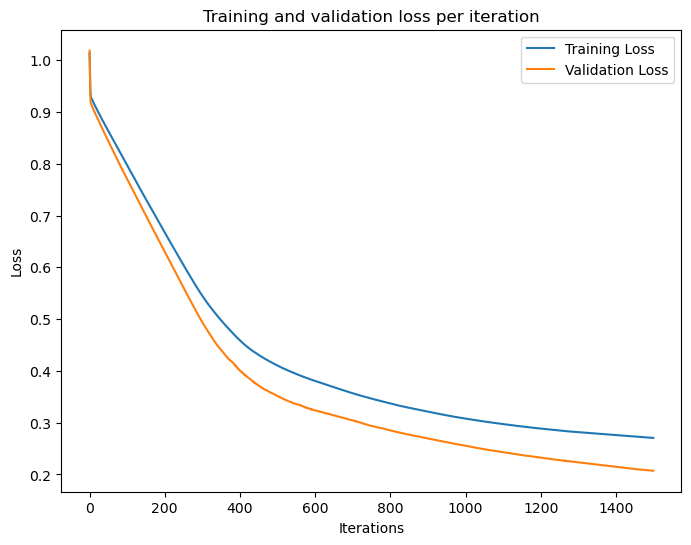

In [40]:
####################################################################################
# TODO: using matplotlib.pyplot package plot the training loss and validation loss #
# using loss_loss_history and loss_val_history                                     #
####################################################################################

plt.figure(figsize=(8,6))
plt.plot(loss_history, label='Training Loss')
plt.plot(loss_val_history, label='Validation Loss')
plt.title('Training and validation loss per iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

####################################################################################
#                                 END OF YOUR CODE                                 #
####################################################################################


### Question 1:
With changing your hyper parameters, find a configuration of hyper parameters that cause your loss to increase after each iteration and then report that configuration in the next cell. Explain why our loss increases?
Write your answer in ""

std = "0.0001" <br>
num_iters = "1500"<br>
reg_coeff = "1"<br>
learning_rate = "1e-2"<br>

Q1, Answer: It was found, that when the learning rate is increased above a certain value and the regularization coefficient is decreased, the loss will continue to increase. Since the learning rate dictates the size of the optimization step the model takes after each iteration with gradient descent, if the learning rate is too high, the model is unlikely find the minimum and will never converge. This combined with a decreased reguarization will reduce the impact the penalty will have on the weight updates. Consequently, the weight can get really large, thus causing the model to overfit. 

### Question 2:
In this cell please explain the reason of this event<br>
Answer:

In [41]:
val_preds =  model.predict(X_test)
###########################################################################################
# TODO: find the Confusion Matrix between val_preds and real labels (y_test) for test data#
# then report the accuracy of the model.                                                  #
# you are not allowed to use any premade function for accuracy and confusion matrix       #
###########################################################################################

#y_test = y_test.values()
#start by initializing values for true positives, true negatives, false positive and false negatives
TP = 0
FP = 0
TN = 0
FN = 0

#Now, iterate over the predictions and compare them to their actual class

for i in range(len(val_preds)):
    if val_preds[i] == y_test[i]:
        if val_preds[i] == 1: 
            TP += 1
        else: 
            TN += 1
    else:
        if val_preds[i] == 1:
            FP += 1
        else: 
            FN += 1
            
#report the accuracy of model as the fraction of the total amount of prediction that are correctly predicted

accuracy = ((TP + TN) / len(val_preds)) * 100
print("Model accuracy is:", accuracy, "%")

###########################################################################################
#                                END OF YOUR EXPLANATION                                  #
###########################################################################################


Model accuracy is: 88.59649122807018 %


In the next part, we sample from training data with certain size (batch size) instead of using all the training data in each iteration, and train our model on batch data:

In [50]:
std = 0.0001
batch_size = 200
num_iters = 15000
reg_coeff = 20
learning_rate=1e-6
model = SVM(n_features=X_train.shape[1], std= std )

In [51]:
loss_history = []
loss_val_history = []
for it in range(num_iters):
    X_batch = None
    y_batch = None
    ################################################################################
    # TODO: Sample batch_size elements from the training data and their            #
    # corresponding labels to use in this round of gradient descent.               #
    # Store the data in X_batch and their corresponding labels in                  #
    # y_batch; after sampling X_batch should have shape (batch_size, n_features)   #
    # and y_batch should have shape (batch_size,)                                  #
    #                                                                              #
    # Hint: Use np.random.choice to generate indices. Sampling with                #
    # replacement is faster than sampling without replacement.                     #
    ################################################################################

    batch_indicies = np.random.choice(len(X_train), batch_size, replace=True) #picked batch size 16
    
    #defining batches based on indicies
    X_batch = X_train[batch_indicies]
    y_batch = y_train[batch_indicies]
    
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    loss = model.loss(X_batch, y_batch, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_batch, y_batch, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 1.004382, val acc 36.96%
iteration 100, loss 0.832136, val acc 93.48%
iteration 200, loss 0.693934, val acc 86.96%
iteration 300, loss 0.565007, val acc 86.96%
iteration 400, loss 0.449454, val acc 86.96%
iteration 500, loss 0.473067, val acc 89.13%
iteration 600, loss 0.399510, val acc 86.96%
iteration 700, loss 0.312544, val acc 91.30%
iteration 800, loss 0.297177, val acc 91.30%
iteration 900, loss 0.327042, val acc 93.48%
iteration 1000, loss 0.325802, val acc 93.48%
iteration 1100, loss 0.332911, val acc 95.65%
iteration 1200, loss 0.324439, val acc 93.48%
iteration 1300, loss 0.271991, val acc 93.48%
iteration 1400, loss 0.285509, val acc 93.48%
iteration 1500, loss 0.243421, val acc 93.48%
iteration 1600, loss 0.255768, val acc 95.65%
iteration 1700, loss 0.248115, val acc 95.65%
iteration 1800, loss 0.227813, val acc 95.65%
iteration 1900, loss 0.294459, val acc 97.83%
iteration 2000, loss 0.181314, val acc 97.83%
iteration 2100, loss 0.226469, val acc 95.65%


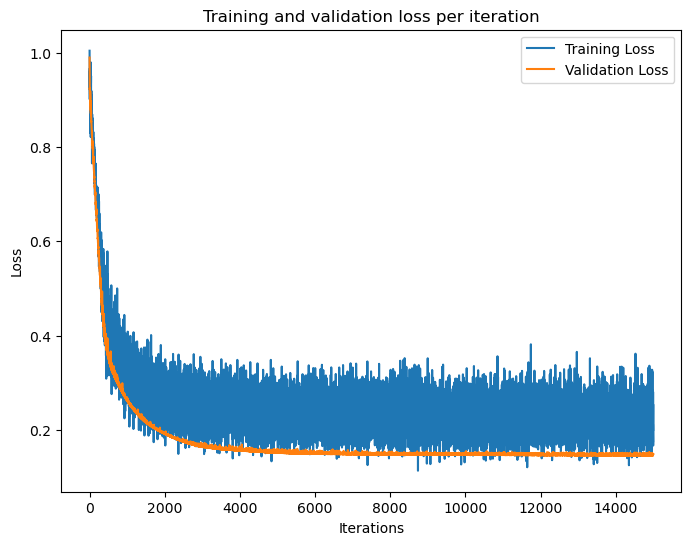

In [52]:
####################################################################################
# TODO: using matplotlib.pyplot package plot the training loss and validation loss #

####################################################################################

#(copied from the other plotting code chunk)
plt.figure(figsize=(8,6))
plt.plot(loss_history, label='Training Loss')
plt.plot(loss_val_history, label='Validation Loss')
plt.title('Training and validation loss per iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

####################################################################################
#                                 END OF YOUR CODE                                 #
####################################################################################